In [11]:
# 필요한 라이브러리를 가져온다.
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [43]:
df1 = pd.read_csv(r'C:/Users/Bark/Desktop/광주_인공지능_사관학교/코로나 데이터 시각화하기/코로나 데이터관련자료/korea_owid_covid_data_2.csv')
# 환자정보 데이터를 불러온다.
df2 = pd.read_csv(r'C:/Users/Bark/Desktop/광주_인공지능_사관학교/코로나 데이터 시각화하기/coronavirusdataset_20200601/PatientInfo.csv')

df3 = pd.read_csv(r'C:/Users/Bark/Desktop/광주_인공지능_사관학교/코로나 데이터 시각화하기/코로나 데이터관련자료/Korea_mobility.csv')

# Google Mobility 서울
df4 = pd.read_csv(r'C:/Users/Bark/Desktop/광주_인공지능_사관학교/코로나 데이터 시각화하기/코로나 데이터관련자료/Korea_mobility_seoul.csv')

In [15]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         251 non-null    object 
 1   continent                        251 non-null    object 
 2   location                         251 non-null    object 
 3   date                             251 non-null    object 
 4   total_cases                      251 non-null    int64  
 5   new_cases                        251 non-null    int64  
 6   new_cases_smoothed               245 non-null    float64
 7   total_deaths                     251 non-null    int64  
 8   new_deaths                       251 non-null    int64  
 9   new_deaths_smoothed              245 non-null    float64
 10  total_cases_per_million          251 non-null    float64
 11  new_cases_per_million            251 non-null    float64
 12  new_cases_smoothed_per

In [4]:
print("데이터 행의 수 = {}".format(df1.shape[0]))

데이터 행의 수 = 251


In [5]:
df1.isnull().sum().sum()

646

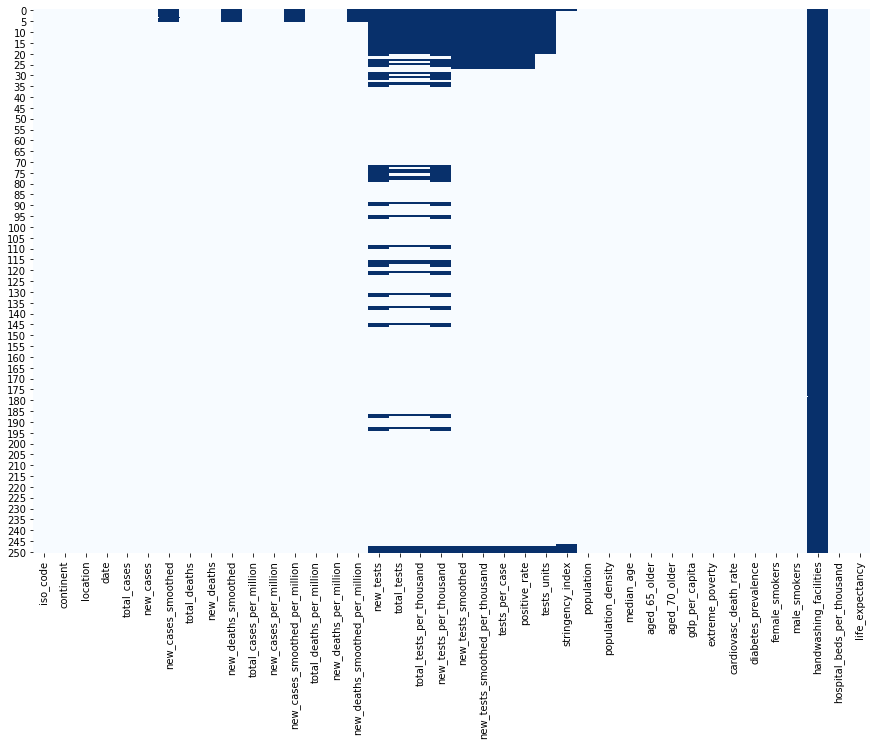

In [6]:
# 결측치를 시각화 해본다.
plt.figure(figsize = (15,10))                                       # figsize=(가로, 세로) 크기.
sns.heatmap(df1.isnull(), cmap='Blues', cbar=False)
plt.show()

In [7]:
plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)

# 코로나검사를 해서 실제로 확진자가 많은 확인
plt.plot(df1['date'], df1['tests_per_case'] ,label='tests_per_case')

# 정부 규제에 따라서 확진자 수가 변동이 있는지 확인해본다.
# 신천지 확진자가 늘어감에따라 정부 규제가 올라감 
plt.plot(df1['date'], df1['stringency_index'] * 10  ,label='stringency_index')
plt.plot(df1['date'], df1['new_cases'], label ='new_cases')
plt.legend()
plt.show()



In [8]:

# positive Rate를 확인(높을수록 확진자를 많이 검사함)
plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)
plt.plot(df1['date'], df1['positive_rate'] ,label='positive_rate')
plt.legend()
plt.show()


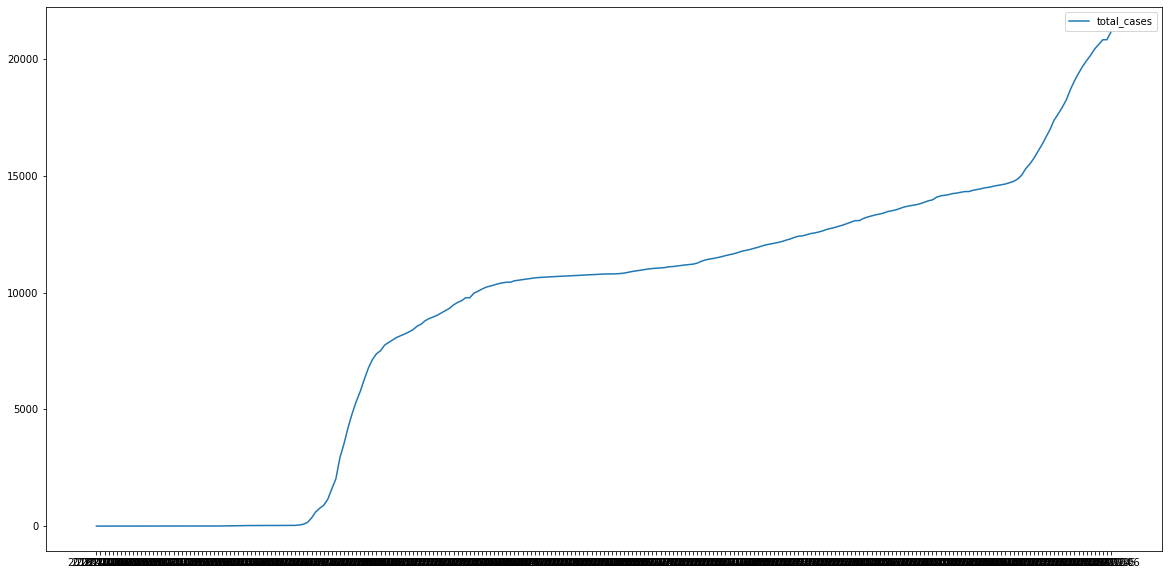

In [9]:
# 날짜별 전체 확진자수 표기
plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)
plt.plot(df3['date'], df1['total_cases'] ,label='total_cases')
plt.legend()
plt.show()

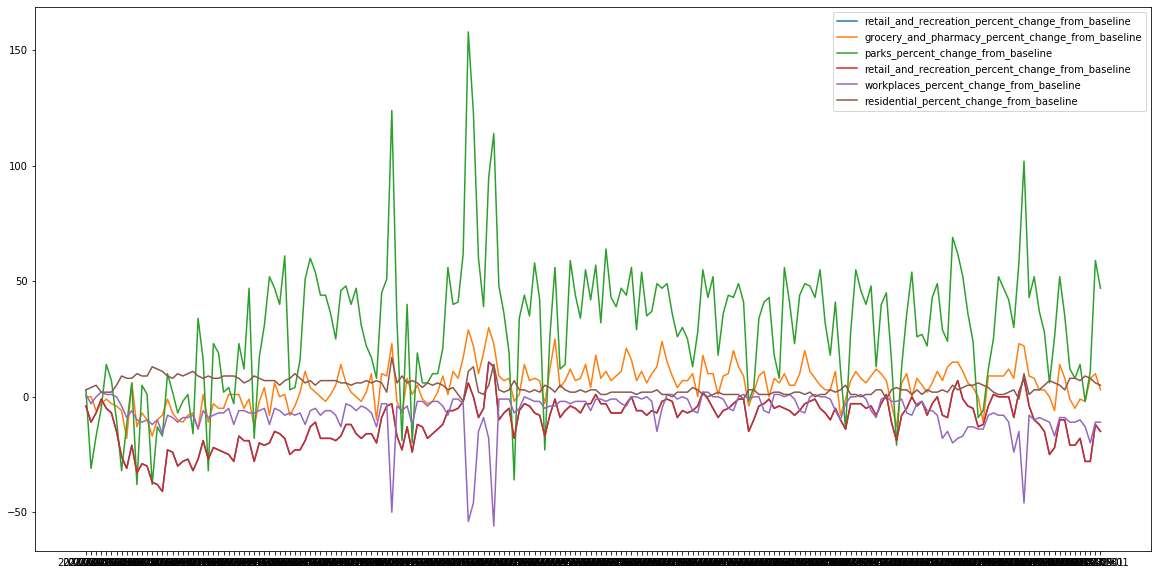

In [26]:

plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)
plt.plot(df3['date'], df3['retail_and_recreation_percent_change_from_baseline'] ,label='retail_and_recreation_percent_change_from_baseline')
plt.plot(df3['date'], df3['grocery_and_pharmacy_percent_change_from_baseline'] ,label='grocery_and_pharmacy_percent_change_from_baseline')
plt.plot(df3['date'], df3['parks_percent_change_from_baseline'] ,label='parks_percent_change_from_baseline')
plt.plot(df3['date'], df3['retail_and_recreation_percent_change_from_baseline'] ,label='retail_and_recreation_percent_change_from_baseline')
plt.plot(df3['date'], df3['workplaces_percent_change_from_baseline'] ,label='workplaces_percent_change_from_baseline')
plt.plot(df3['date'], df3['residential_percent_change_from_baseline'] ,label='residential_percent_change_from_baseline')
plt.legend()
plt.show()

In [39]:
# Google Mobility와 확진자수랑 관계성을 하나씩 찾아봄
# 소매점 및 여가 시설
# 식당, 카페, 쇼핑센터, 놀이공원, 박물관, 도서관, 영화관과 같은 장소에서 나타난 이동 추이
# 확진자수의 증가와 비슷한 양상을 보이고있음
plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)
plt.plot(df3['date'], np.power(df3['retail_and_recreation_percent_change_from_baseline'],2) ,label='retail_and_recreation_percent_change_from_baseline')
plt.plot(df1['date'], df1['new_cases'], label ='new_cases')
plt.legend()
plt.show()

country_region_code country_region  sub_region_1  sub_region_2  \
0                    KR    South Korea           NaN           NaN   
1                    KR    South Korea           NaN           NaN   
2                    KR    South Korea           NaN           NaN   
3                    KR    South Korea           NaN           NaN   
4                    KR    South Korea           NaN           NaN   
..                  ...            ...           ...           ...   
195                  KR    South Korea           NaN           NaN   
196                  KR    South Korea           NaN           NaN   
197                  KR    South Korea           NaN           NaN   
198                  KR    South Korea           NaN           NaN   
199                  KR    South Korea           NaN           NaN   

     metro_area  iso_3166_2_code  census_fips_code        date  \
0           NaN              NaN               NaN  2020-02-15   
1           NaN              NaN               NaN  2020-02-16   
2           NaN              NaN               NaN  2020-02-17   
3           NaN              NaN               NaN  2020-02-18   
4           NaN              NaN               NaN  2020-02-19   
..          ...              ...               ...         ...   
195         NaN              NaN               NaN  2020-08-28   
196         NaN              NaN               NaN  2020-08-29   
197         NaN              NaN               NaN  2020-08-30   
198         NaN              NaN               NaN  2020-08-31   
199         NaN              NaN               NaN  2020-09-01   

     retail_and_recreation_percent_change_from_baseline  \
0                                                   -4    
1                                                  -11    
2                                                   -7    
3                                                   -1    
4                                                   -5    
..                                                 ...    
195                                                -18    
196                                                -28    
197                                                -28    
198                                                -12    
199                                                -15    

     grocery_and_pharmacy_percent_change_from_baseline  \
0                                                    0   
1                                                    0   
2                                                   -6   
3                                                   -3   
4                                                   -1   
..                                                 ...   
195                                                 -1   
196                                                 -2   
197                                                  8   
198                                                 10   
199                                                  3   

     parks_percent_change_from_baseline  \
0                                     3   
1                                   -31   
2                                   -17   
3                                    -5   
4                                    14   
..                                  ...   
195                                  14   
196                                  -2   
197                                  11   
198                                  59   
199                                  47   

     transit_stations_percent_change_from_baseline  \
0                                               -6   
1                                              -15   
2                                               -6   
3                                               -3   
4                                               -4   
..                                             ...   
195                                            -24   
196            

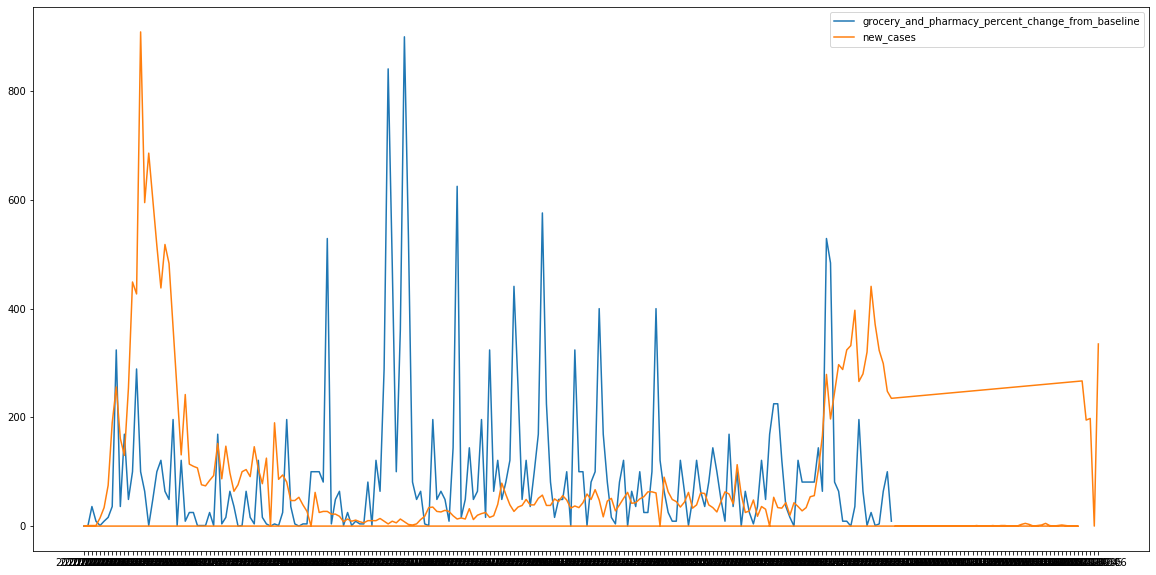

In [32]:
# Google Mobility와 확진자수랑 관계성을 하나씩 찾아봄
# 식료품점 및 약국
# 식료품 매장, 식자재 창고, 농산물 시장, 전문 식품 매장, 드럭스토어, 약국과 같은 장소에서 나타난 이동 추이
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(df3['date'], np.power(df3['grocery_and_pharmacy_percent_change_from_baseline'],2) ,label='grocery_and_pharmacy_percent_change_from_baseline')
plt.plot(df1['date'], df1['new_cases'], label ='new_cases')
plt.legend()
plt.show()

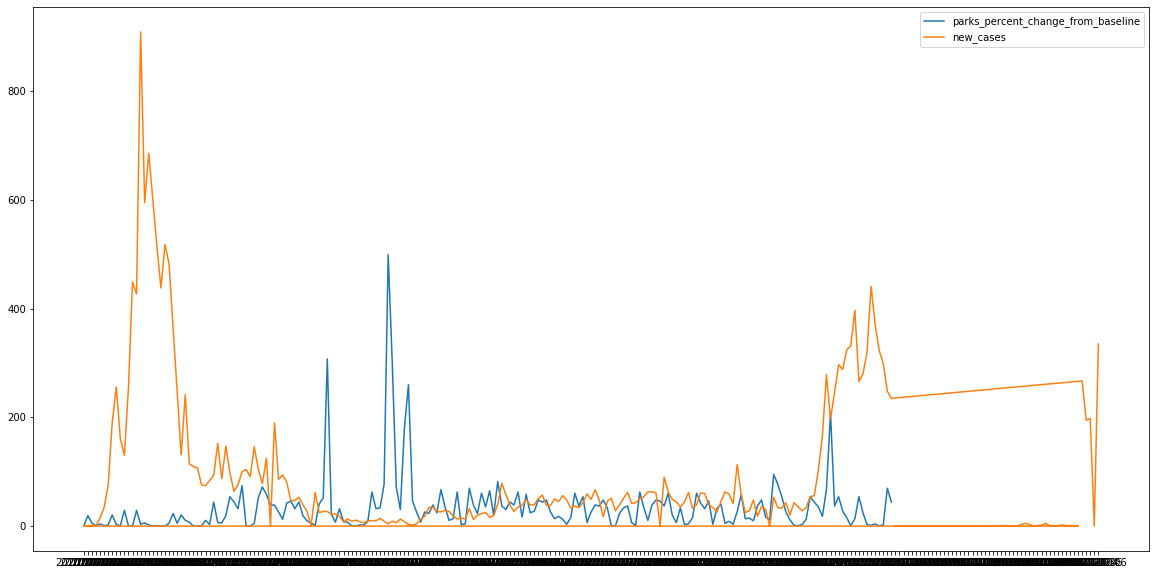

In [42]:
# Google Mobility와 확진자수랑 관계성을 하나씩 찾아봄
# 공원
# 지역 공원, 국립 공원, 공용 해수욕장, 마리나, 반려견 공원, 광장, 공공 정원과 같은 장소에서 나타난 이동 추이입니다
plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)
plt.plot(df3['date'], np.power(df3['parks_percent_change_from_baseline'],2) / 50 ,label='parks_percent_change_from_baseline')
plt.plot(df1['date'], df1['new_cases'], label ='new_cases')
plt.legend()
plt.show()

In [40]:
# Google Mobility와 확진자수랑 관계성을 하나씩 찾아봄
# 대중교통 정거장
# 지하철, 버스, 기차역 등의 대중교통 허브와 같은 장소에서 나타난 이동 추이입니다.
# 대중교통량이 많이 증가함에따라 확진자수또한 증가함을 볼수있음
plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)
plt.plot(df3['date'], np.power(df3['transit_stations_percent_change_from_baseline'],2) ,label='transit_stations_percent_change_from_baseline')
plt.plot(df1['date'], df1['new_cases'], label ='new_cases')
plt.legend()
plt.show()

In [50]:
# 대중교통 이용량과 식당, 카페, 쇼핑센터, 놀이공원, 박물관, 도서관, 영화관과 같은 장소에서 
# 사람들의 활동이 활발할수록 코로나 확진자가 늘어남
plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)
plt.plot(df3['date'], np.power(df3['transit_stations_percent_change_from_baseline'] + df3['retail_and_recreation_percent_change_from_baseline'], 2) * 0.1,
label='transit_stations_percent_change_from_baseline')
plt.plot(df1['date'], df1['new_cases'], label ='new_cases')
plt.legend()
plt.show()

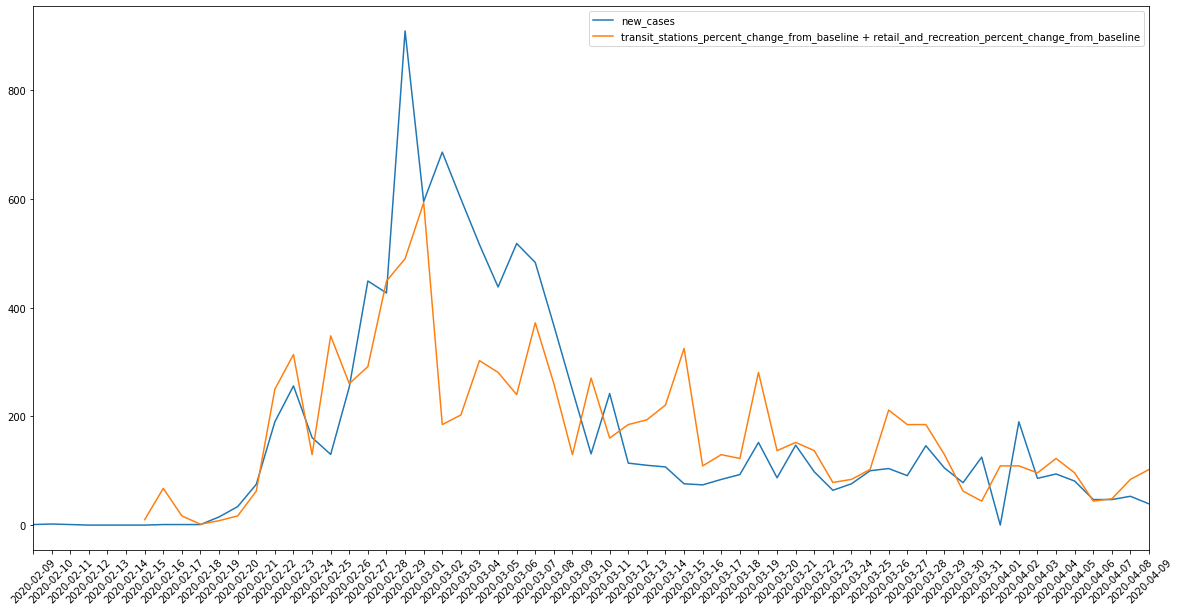

In [127]:
# 신천지 사태때로 본 이동량과 확진자사이의 관계
plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)
plt.plot(df1['date'], df1['new_cases'], label ='new_cases')
plt.plot(df3['date'], np.power(df3['transit_stations_percent_change_from_baseline'] + df3['retail_and_recreation_percent_change_from_baseline'], 2) * 0.1,
label='transit_stations_percent_change_from_baseline + retail_and_recreation_percent_change_from_baseline')
plt.xticks(rotation = 45)
plt.xlim([40, 100])
plt.legend()
plt.show()

In [126]:
# 신천지 사태때로 본 이동량과 확진자사이의 관계
plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)
plt.plot(df1['date'][200:-1], df1['new_cases'][200:-1], label ='new_cases')
plt.plot(df3['date'][156:-1], np.power(df3['transit_stations_percent_change_from_baseline'][156: -1] + df3['retail_and_recreation_percent_change_from_baseline'][156: -1], 2) * 0.1,
label='transit_stations_percent_change_from_baseline + retail_and_recreation_percent_change_from_baseline')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [92]:
print(df1['date'][200:-1])

200    2020-07-18
201    2020-07-19
202    2020-07-20
203    2020-07-21
204    2020-07-22
205    2020-07-23
206    2020-07-24
207    2020-07-25
208    2020-07-26
209    2020-07-27
210    2020-07-28
211    2020-07-29
212    2020-07-30
213    2020-07-31
214    2020-08-01
215    2020-08-02
216    2020-08-03
217    2020-08-04
218    2020-08-05
219    2020-08-06
220    2020-08-07
221    2020-08-08
222    2020-08-09
223    2020-08-10
224    2020-08-11
225    2020-08-12
226    2020-08-13
227    2020-08-14
228    2020-08-15
229    2020-08-16
230    2020-08-17
231    2020-08-18
232    2020-08-19
233    2020-08-20
234    2020-08-21
235    2020-08-22
236    2020-08-23
237    2020-08-24
238    2020-08-25
239    2020-08-26
240    2020-08-27
241    2020-08-28
242    2020-08-29
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
248    2020-09-04
249    2020-09-05
Name: date, dtype: object
